<a href="https://colab.research.google.com/github/mcarr-emory/Math210Labs/blob/master/Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name: 

### Student ID: 

# Math 210 Lab 3

Goals:
 
* Generate random data using numpy.
* Generate histograms using matplotlib.
* Determine how the average of a sample of a random variable behaves.


In this lab we're going to generate random data and display it.  First we'll need to import libraries.

In [0]:
import numpy as np
from numpy.polynomial import polynomial as poly 
import matplotlib.pyplot as plt




First you'll need a random variable to study.  Fill in your name in the code below (remember the ''), run it, and your random variable will appear in the output box.

In [0]:
yourName='bob'  #your name goes between the ' marks.

def alphanum(name):
  if 64<ord(name[0])<91:
    return ord(name[0])-64
  elif 96<ord(name[0])<123:
    return ord(name[0])-96
  else:
    return 0
  
global myrand

if alphanum(yourName)==0:
  print("Your name doesn't seem to start with a letter. Try again.")
  students=[]
elif 1<=alphanum(yourName)<=3:
  def f(x):
    if 0<x<1:
      return x*(1-x)**4*30
    else:
      return 0
  x=np.arange(-0.5,1.5,0.01)
  rvName='beta(2,5)'
  def myrand(n):
    return np.random.beta(2,5,n)
  npCommand='np.random.beta(2,5,n)'
  latexDensity='$f_X(x)=30x(1-x)^4\qquad 0\leq x\leq 1$'
elif 4<=alphanum(yourName)<=6:
  def f(x):
    if 3<x<6:
      return (2*x-6)/9
    else:
      return 0
  x=np.arange(2,7,0.01)
  rvName='triangular(3,6,6)'
  def myrand(n):
    return np.random.triangular(3, 6, 6, n)  
  npCommand='np.random.triangular(3, 6, 6, n)'
  latexDensity='$f_X(x)=(2x-6)/{9}\qquad 3\leq x\leq 6$'
elif 7<=alphanum(yourName)<=10:
  def f(x):
    if 1<x<6:
      return 0.2
    else:
      return 0
  x=np.arange(0,7,0.01)
  rvName='uniform(1,6)'
  def myrand(n):
    return np.random.triangular(1, 6, n)  
  npCommand='np.random.uniform(1, 6,n)'
  latexDensity='$f_X(x)=0.2\qquad 1\leq x\leq 6$'
#elif 11<=alphanum(yourName)<=12: to do
#elif 13<=alphanum(yourName)<=17: to do
#elif 18<=alphanum(yourName)<=21: to do
#elif 22<=alphanum(yourName)<=26: to do
  

print(f'You will be working with a {rvName} distribution.  Its probability density function is graphed below.')

plt.plot(x,list(map(f,x)))
axis=plt.gca()
axis.set_title(latexDensity)
plt.show()

print(f'The function myrand(n) has been defined to call {npCommand} which produces a size n sample of your random variable.')

Go ahead an generate a size 10 sample from your distribution.

In [0]:
myrand(10)

array([5.42996492, 4.50636106, 5.12166611, 5.54919705, 5.39061091,
       4.88388945, 5.11535124, 3.7465549 , 5.17282542, 4.00330185])

### Generating a Histogram

This is cool, but it doesn't tell us much.  Fortunately, the matplotlib package can produce histograms.  Instead of spewing our sample into the output box, let's assign it to the vairable `sample`.  The remaining code will create a histogram showing the number of samples that fall into each range.

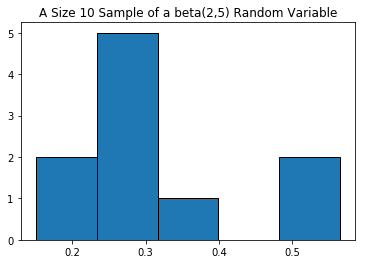

In [8]:
sample= myrand(10)    

plt.hist(sample, edgecolor='black', bins=5)
axis=plt.gca()
axis.set_title(f'A Size {str(len(sample))} Sample of a {rvName} Random Variable')
plt.show()

That makes a nice picture, but ten samples sorted into five categories is too few to notice a pattern.  

1. Try size one million instead.

2. Try increasing the number of bins to 20 or more.

3. How does the resulting histogram relate to your density function? 

Once you've explored that, let's compute the average value of your sample.  Can you explain what this code is doing?


In [0]:
sum=0
for i in sample:
  sum+=i
print(sum/len(sample))

### Distribution of the Averages

With 1000000 samples, the average of the sample should be very close to the average value of the variable.  With fewer samples, the average of a sample could vary in an interesting way.  Let's explore this by creating lots of sample averages.  We'll write a function to do this.  It will depend on
* m, the number of averages to compute
* n, the size of each sample that we're averaging.

In [0]:
def averages(m,n,draw=False):
  global avg
  avg=[]
  for i in range(m):
   sample= myrand(n)       
   sum=0
   for i in sample:
      sum+=i
   avg.append(sum/len(sample))
  if draw==True:
    plt.hist(avg, edgecolor='black', bins=50)
    axis=plt.gca()
    axis.set_title(f'Average Values of {rvName} for Sample Size $n={n}$')
    plt.show()

The following code should plot a histogram of 10,000 averages, each of a sample size 10.

In [0]:
averages(10000,10,draw=True)

"Wow," you say, "is that a bell curve?"  

Yes.  That is a bell curve.  Want to see?  Let's import a normal distribution density function from the `scipy` library.

In [0]:
from scipy.stats import norm

Now lets pick a set of x values using `np.arange` and make a plot where we plug them into the probability density function of a normal variable. We'll put this and a histogram of averages on the same graph to see how they match up.

In [0]:
plt.plot(x, 200*norm.pdf(x,0,1))
averages(10000,10)
plt.hist(avg, edgecolor='black', bins=50)
plt.show()

I bet that didn't work at all.  That's because we were graphing the normal distribution with $\mu=0$ and $\sigma=1$, then scaling it up by 200.  That's a bell curve, but it's probably not *your* bell curve.  

# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Canvas.

## Q1 
Copy/paste the bell curve code down here and play with the scale, $\mu$ and $\sigma$ until it matches your histogram reasonably well. You can find a geometric interpretation of $\mu$ and  $\sigma$ on our slides, if you need to.  You may also want to adjust the range of `x` using `x=np.arange(a,b,s)` (values from a to b with a step size s).

## Q2

Use the `averages` function to generate histograms for larger sample sizes.  What appears to happen to $\sigma$ as the sample size changes? 

## Q3 

Compare your initial function and resulting averages with other students and answer.  
1. How do the shape and properties of your initial density function appear to correspond to the $\sigma$ and $\mu$ of your distribution of averages? 
2. Why does this corerspondence make sense?

Be sure you compare apples to apples. If you and your neighbor are using different sample sizes, you won't be able to account for the effect of that in the data.